# Binomial harmonic series puzzle

In this puzzle I explore the variation on Sam Walter's puzzle [1].
Inspired by Rami Younes's[2] comment about Lucas's theorem[3].

For which integers $a > 1, k > 0$ does the series below converge?

$$
\sum_{n=1}^\infty \frac{\exp\left(\frac{2\pi i}{a}\binom{n}{k}\right)}{n}
$$


[1]: https://twitter.com/SamuelGWalters/status/1307887858049454080
[2]: https://twitter.com/ramiuness/status/1308802293790318592
[3]: https://en.wikipedia.org/wiki/Lucas%27s_theorem

## More concrete variation (for twitter)


$$
\text{For which positive integers $k$ does the series below converge?}
$$
$$
\sum_{n=1}^\infty \frac{\left(-\frac{1}{2}+\frac{\sqrt{3}}{2}i\right)^{\binom{n}{k}}}{n}
$$

In [53]:
exp(2*pi*i/3)

1/2*I*sqrt(3) - 1/2

## plotting some partial sums

In [2]:
def unfold(f, x0):
    while x0:
        yield x0
        x0 = f(x0)
        
def skip(n, gen):
    for _ in range(n):
        gen.next()
    x = gen.next()
    while x:
        yield x
        x = gen.next()

def rev_padic(n, p):
    if p <= 1:
        raise ValueError("p <= 1")
    def f((q0, r0)):
        if q0 > 0:
            return divmod(q0, p)
    return map(lambda pair: pair[1],
              skip(1, unfold(f, (n,0))))

def zip_and_pad(xs, ys):
    for i in range(max(len(xs),len(ys))):
        if i >= len(xs):
            el = (0, ys[i])
        elif i >= len(ys):
            el = (xs[i], 0)
        else:
            el = (xs[i], ys[i])
        yield el
        
def lucas(n, k, p):
    kdigits = rev_padic(k, p)
    ndigits = rev_padic(n, p)
    pairs = [ binomial(nd, kd) % p
             for nd, kd in zip_and_pad(ndigits, kdigits)]
    return product(pairs) % p

def accumsum(xs):
    accum = 0
    for x in xs:
        yield accum
        accum += x

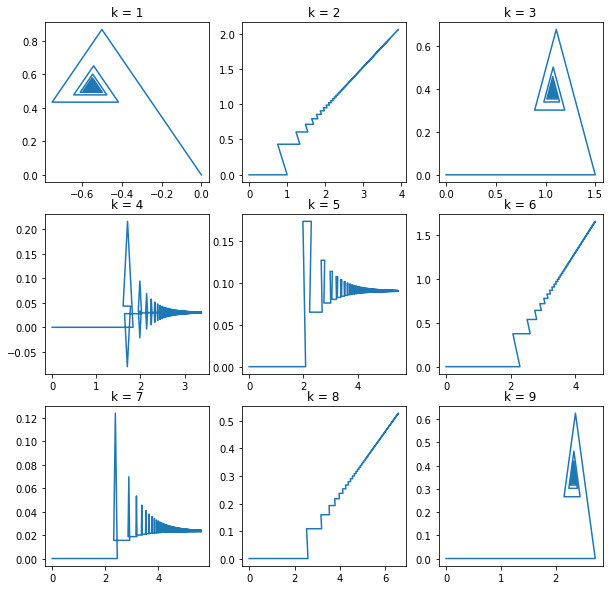

In [79]:
def plotme(k0=1, p=2, num_terms=10):
    import matplotlib.pyplot as plt
    figure, axes = plt.subplots(3,3)
    figure.set_size_inches(10,10)
    for m in range(9):
        (row, col) = divmod(m,3)
        k = k0 + m
        w = complex(exp(i*2*pi/p))
        s = list(accumsum([w^lucas(n, k, p)/n
             for n in range(1,num_terms+1)]))
        axes[row,col].plot(
            [real(x) for x in s],
            [imag(x) for x in s],)
        axes[row,col].set_title("k = " + str(k))
    
plotme(1, 3, 1000)

## Limit in the linear case k = 1

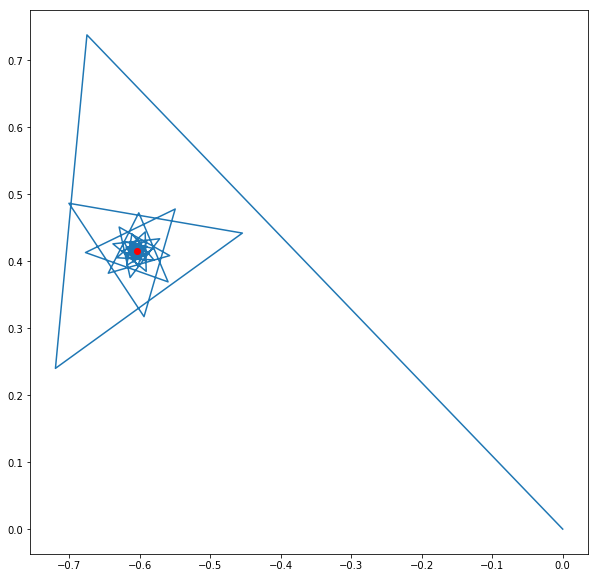

In [68]:
def binom(n, x):
    assert round(n) == n
    if round(x) == x:
        return binomial(n,x)
    return\
        product([(1+i)/(x - i) for i in range(n)])\
        * sin(pi * x) / (pi * x)
    
def plotme(p=3, num_terms=10):
    import matplotlib.pyplot as plt
    figure = plt.figure()
    figure.set_size_inches(10,10)
    s = list(accumsum([
        complex(exp(2*pi*i*n/p)/n)
        for n in range(1,num_terms+1)]))
    plt.plot([real(x) for x in s],
             [imag(x) for x in s])
    plt.plot([real(-log(1-exp(2*pi*i/p)))],
             [imag(-log(1-exp(2*pi*i/p)))],
             color="red", marker="o")

plotme(e, 100)

## Relationship with the pseudo-random distribution of $\frac{1}{a}\binom{n}{x} \mod 1$?

No idea...

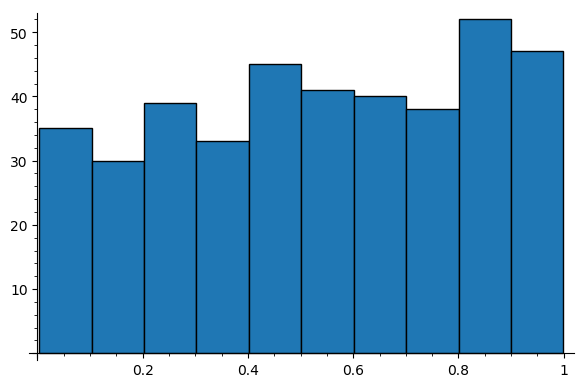

In [144]:
import matplotlib.pyplot as plt

def fbinom(n, x):
    assert round(n) == n
    if round(x) == x:
        return binomial(n,x)
    return\
        product([(1 + i) / (x - i) for i in range(n)])\
        * sin(pi * x) / (pi * x) 

histogram([frac(fbinom(n, 2.5)/1.5) for n in range(400)])

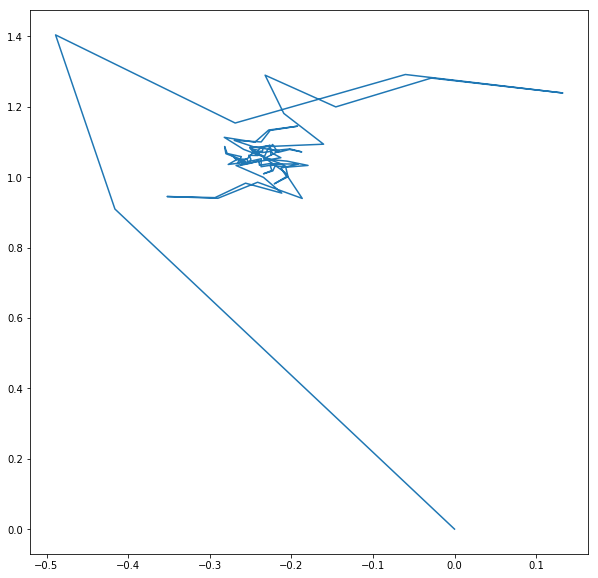

In [83]:
def plotme(p=3, num_terms=10):
    import matplotlib.pyplot as plt
    figure = plt.figure()
    figure.set_size_inches(10,10)
    s = list(accumsum([
        complex(exp(2*pi*i*n^2/p)/n)
        for n in range(1,num_terms+1)]))
    plt.plot([real(x) for x in s],
             [imag(x) for x in s])
plotme(pi, 100)